In [25]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time

In [26]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://books.toscrape.com/")
print(driver.title)

All products | Books to Scrape - Sandbox


In [27]:
categories = driver.find_elements(By.CSS_SELECTOR,".side_categories ul li a")
links = [(cat.text.strip(),cat.get_attribute("href")) for cat in categories]

In [28]:
for name, link in links[:5]:
    driver.get(link)
    books = driver.find_elements(By.CSS_SELECTOR,"article.product_pod")[:4]
    for book in books:
        title = book.find_element(By.TAG_NAME, "h3").text
        price = book.find_element(By.CLASS_NAME, "price_color").text
        print (name,title,price)

Books A Light in the ... £51.77
Books Tipping the Velvet £53.74
Books Soumission £50.10
Books Sharp Objects £47.82
Travel It's Only the Himalayas £45.17
Travel Full Moon over Noah’s ... £49.43
Travel See America: A Celebration ... £48.87
Travel Vagabonding: An Uncommon Guide ... £36.94
Mystery Sharp Objects £47.82
Mystery In a Dark, Dark ... £19.63
Mystery The Past Never Ends £56.50
Mystery A Murder in Time £16.64
Historical Fiction Tipping the Velvet £53.74
Historical Fiction Forever and Forever: The ... £29.69
Historical Fiction A Flight of Arrows ... £55.53
Historical Fiction The House by the ... £36.95
Sequential Art Scott Pilgrim's Precious Little ... £52.29
Sequential Art Tsubasa: WoRLD CHRoNiCLE 2 ... £16.28
Sequential Art This One Summer £19.49
Sequential Art The Nameless City (The ... £38.16


In [29]:
### https://quotes.toscrape.com/scroll

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://quotes.toscrape.com/scroll")

In [30]:
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll to the bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # wait for new quotes to load

    # Calculate new scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")

    # If height hasn't changed, we've reached the end
    if new_height == last_height:
        break
    last_height = new_height


In [32]:
quotes_data = []

quotes = driver.find_elements(By.CLASS_NAME, "quote")

for quote in quotes:
    text = quote.find_element(By.CLASS_NAME, "text").text
    author = quote.find_element(By.CLASS_NAME, "author").text
    tags = [tag.text for tag in quote.find_elements(By.CLASS_NAME,"tag")]

    quotes_data.append({
        "text": text,
        "author": author,
        "tags":tags
    })

In [35]:
for q in quotes_data[:5]:
    print(q)

{'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', 'author': 'Albert Einstein', 'tags': ['change', 'deep-thoughts', 'thinking', 'world']}
{'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', 'author': 'J.K. Rowling', 'tags': ['abilities', 'choices']}
{'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', 'author': 'Albert Einstein', 'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']}
{'text': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', 'author': 'Jane Austen', 'tags': ['aliteracy', 'books', 'classic', 'humor']}
{'text': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", 'author': 'Marilyn Monroe', 'tags': ['be-yourself', 'inspirational']}


In [39]:
import pandas as pd
df = pd.DataFrame(quotes_data)

In [40]:
df

,text,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"
...,...,...,...
95,“You never really understand a person until yo...,Harper Lee,[better-life-empathy]
96,“You have to write the book that wants to be w...,Madeleine L'Engle,"[books, children, difficult, grown-ups, write,..."
97,“Never tell the truth to people who are not wo...,Mark Twain,[truth]
98,"“A person's a person, no matter how small.”",Dr. Seuss,[inspirational]


In [43]:
all_tags = [tag for tags_list in df["tags"] for tag in tags_list]
tag_counts = pd.Series(all_tags).value_counts().head(10)
print(tag_counts)

love             14
inspirational    13
life             13
humor            12
books            11
reading           7
friendship        5
friends           4
truth             4
death             3
Name: count, dtype: int64


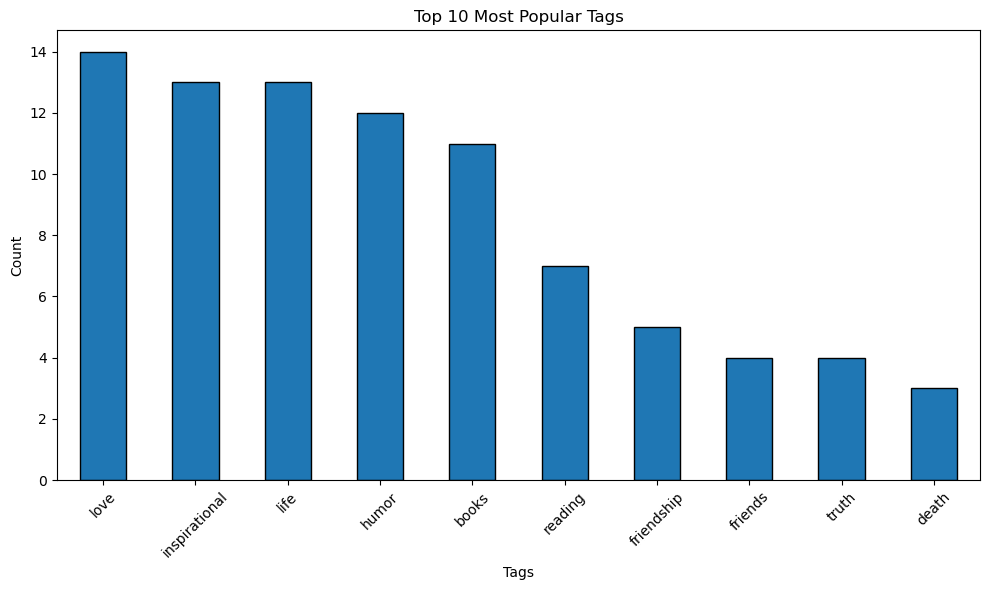

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', edgecolor='black')

plt.title("Top 10 Most Popular Tags")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [79]:
##################### GET ALL FILMSSS BY YEARSSSSSSSS https://www.scrapethissite.com/pages/ajax-javascript/
from selenium.webdriver.support.ui import WebDriverWait
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.scrapethissite.com/pages/ajax-javascript/")
time.sleep(2)
wait = WebDriverWait(driver, 10)

In [80]:
all_movies = []

# Loop through all year buttons
years = driver.find_elements(By.CSS_SELECTOR, "a.year-link")

for year_elem in years:
    year = year_elem.text.strip()
    print("Scraping year:", year)

    # Click the year button
    year_elem.click()
    time.sleep(4)

    # Extract all movie rows
    rows = driver.find_elements(By.CSS_SELECTOR, "div.film")
    for row in rows:
        title = row.find_element(By.CLASS_NAME, "film-title").text
        nominations = row.find_element(By.CLASS_NAME, "film-nominations").text
        awards = row.find_element(By.CLASS_NAME, "film-awards").text
        best_picture = "Yes" in row.find_element(By.CLASS_NAME, "film-best-picture").text
        all_movies.append({
            "year": year,
            "title": title,
            "nominations": int(nominations),
            "awards": int(awards),
            "best_picture": best_picture
        })


Scraping year: 2015
Scraping year: 2014
Scraping year: 2013
Scraping year: 2012
Scraping year: 2011
Scraping year: 2010


In [81]:
df = pd.DataFrame(all_movies)
print(df.head())
driver.quit()

Empty DataFrame
Columns: []
Index: []


In [88]:
import requests
import pandas as pd

all_movies = []
years = range(2010, 2017)  # years available on the page

for year in years:
    url = f"https://www.scrapethissite.com/pages/ajax-javascript/?ajax=true&year={year}"
    response = requests.get(url)
    data = response.json()  # JSON directly from server
    for movie in data:
        movie["year"] = year
        all_movies.append(movie)

# Convert to DataFrame
df = pd.DataFrame(all_movies)

print(df)
print(f"✅ Scraped {len(df)} movies total")


                                              title  year  awards  \
0                                 The King's Speech  2010       4   
1                                         Inception  2010       4   
2                                The Social Network  2010       3   
3                                       The Fighter  2010       2   
4                                       Toy Story 3  2010       2   
..                                              ...   ...     ...   
82                                      Bear Story   2015       1   
83  A Girl in the River: The Price of Forgiveness    2015       1   
84                                      Son of Saul  2015       1   
85                                          Spectre  2015       1   
86                                      Stutterer    2015       1   

    nominations best_picture  
0            12         True  
1             8          NaN  
2             8          NaN  
3             7          NaN  
4             5 